## 머신러닝
# 선형회귀 (Linear Regression)

- 회귀는 데이터가 주어졌을 때, **실수값**인 타겟값(또는 목표값)을 예측하는 방법이다.

나이 | 성별 | 키  | 몸무계
-----|------|-----|-------
35   | 남   | 175 | 67
...  | ...  | ... | ...
27   | 여   | 163 | 52

- 위와 같은 데이터가 주어졌을 때, 키(데이터)에 따른 몸무계(타겟값)를 예측하는 것은 회귀 문제이다.
- 회귀 중에서도, 직선 또는 곧은 평면(굽은 평면이 아님)으로 타겟값을 예측하는 것을 **선형회귀** 라고 한다. 아래 그림에서 직선으로 예측한 경우에 해당한다.

<img src="ch02_02.png" />
<p style="text-align: center;">(출처 : wikipedia - overfitting)</p>

- 속성이 하나 뿐일 때는 위와 같이 직선으로 표현할 수 있지만 속성이 2개일 때는 곧은 평면, 3개 이상에서는 초평면으로 표현한다.

<img src="ch02_03.jpg" />
<p style="text-align: center;">(출처 : https://www.dataquest.io/blog/statistical-learning-for-predictive-modeling-r/)</p>

- 선형회귀에서 굳이 타겟값을 별도로 구분했지만, 다르게 표현하면 타겟값을 포함한 모든 속성의 상관관계를 평면으로 표현한 것으로 이해할 수 있다.
- 아래에서 Iris 데이터를 가지고 선형회귀를 적용해 보겠다.

### 선형회귀의 가정
- y = w\*x + b
- y = w1\*x1 + w2\*x2 + b
- w1, w2, ..., b 를 찾는다

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_iris

iris = load_iris()

In [3]:
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

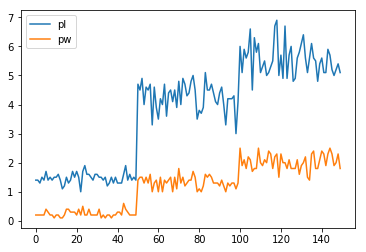

In [10]:
plt.plot(iris.data[:,2])
plt.plot(iris.data[:,3])
plt.legend(['pl','pw'])

Text(0,0.5,'petal width')

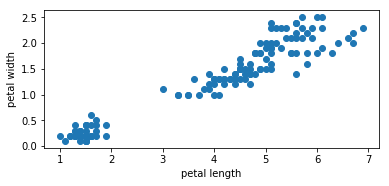

In [5]:
plt.scatter(iris.data[:,2], iris.data[:,3])
plt.axis('scaled')
plt.xlabel('petal length')
plt.ylabel('petal width')

In [6]:
pl = iris.data[:,2]
pw = iris.data[:,3]

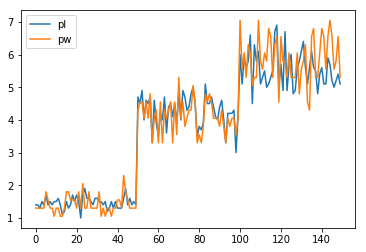

In [7]:
plt.plot(pl)
plt.plot(2.5*pw + 0.8)
plt.legend(['pl','pw'])

(-0.3529480286738351, 7.411908602150538, -0.35000000000000003, 7.35)

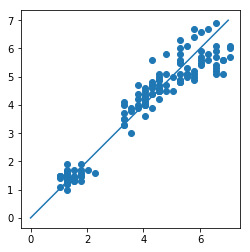

In [9]:
plt.scatter(2.5*pw+0.8, pl)
plt.plot([0,7],[0,7])
plt.axis('scaled')

### 속성 3개로 나머지 속성값 예측하기
- 아이리스 데이터 불러오기

In [4]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris

iris = load_iris()
dir(iris)

['DESCR', 'data', 'feature_names', 'target', 'target_names']

- 앞의 속성 세가지를 가지고 마지막 속성인 Petal Width 값을 예측해 보자

In [5]:
X = iris.data[:,:3]
y = iris.data[:,3]

In [7]:
w1 = 0
w2 = 0
w3 = 0
b = 0

pred_y = w1*X[:,0] + w2*X[:,1] + w3*X[:,2] + b # 가정 (선형회귀라는 가정)
pred_y

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [8]:
y

array([0.2, 0.2, 0.2, 0.2, 0.2, 0.4, 0.3, 0.2, 0.2, 0.1, 0.2, 0.2, 0.1,
       0.1, 0.2, 0.4, 0.4, 0.3, 0.3, 0.3, 0.2, 0.4, 0.2, 0.5, 0.2, 0.2,
       0.4, 0.2, 0.2, 0.2, 0.2, 0.4, 0.1, 0.2, 0.1, 0.2, 0.2, 0.1, 0.2,
       0.2, 0.3, 0.3, 0.2, 0.6, 0.4, 0.3, 0.2, 0.2, 0.2, 0.2, 1.4, 1.5,
       1.5, 1.3, 1.5, 1.3, 1.6, 1. , 1.3, 1.4, 1. , 1.5, 1. , 1.4, 1.3,
       1.4, 1.5, 1. , 1.5, 1.1, 1.8, 1.3, 1.5, 1.2, 1.3, 1.4, 1.4, 1.7,
       1.5, 1. , 1.1, 1. , 1.2, 1.6, 1.5, 1.6, 1.5, 1.3, 1.3, 1.3, 1.2,
       1.4, 1.2, 1. , 1.3, 1.2, 1.3, 1.3, 1.1, 1.3, 2.5, 1.9, 2.1, 1.8,
       2.2, 2.1, 1.7, 1.8, 1.8, 2.5, 2. , 1.9, 2.1, 2. , 2.4, 2.3, 1.8,
       2.2, 2.3, 1.5, 2.3, 2. , 2. , 1.8, 2.1, 1.8, 1.8, 1.8, 2.1, 1.6,
       1.9, 2. , 2.2, 1.5, 1.4, 2.3, 2.4, 1.8, 1.8, 2.1, 2.4, 2.3, 1.9,
       2.3, 2.5, 2.3, 1.9, 2. , 2.3, 1.8])

In [9]:
# 예측했을 때, 판단기준이 필요하다 (무엇이 좋고 나쁜지..) => MSE (비용함수)
오차 = ((pred_y - y)**2).mean()
오차

2.015333333333333

In [10]:
w1 = 0.1
pred_y = w1*X[:,0] + w2*X[:,1] + w3*X[:,2] + b
오차 = ((pred_y - y)**2).mean()
오차

0.8600566666666667

In [19]:
w1 = -0.1
pred_y = w1*X[:,0] + w2*X[:,1] + w3*X[:,2] + b
오차 = ((pred_y - y)**2).mean()
오차

3.8671233333333332

In [ ]:
# 결론 : w1 을 증가시키자
# 이런 과정을 무지하게 많이 반복한다

In [20]:
w1 = 0
w2 = 0.1
pred_y = w1*X[:,0] + w2*X[:,1] + w3*X[:,2] + b
오차 = ((pred_y - y)**2).mean()
오차

1.4017633333333333

In [21]:
w1 = 0
w2 = -0.1
pred_y = w1*X[:,0] + w2*X[:,1] + w3*X[:,2] + b
오차 = ((pred_y - y)**2).mean()
오차

2.819176666666667

- 학습용과 테스트용 으로 데이터 분리하기

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [13]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train) # model.coef_ 와 model.intercept_ 값이 할당됨

pred_y = model.predict(X_test)
display(y_test, pred_y)

model.score(X_test, y_test)

array([1. , 1.9, 1.3, 0.2, 1.4, 2.4, 0.2, 2.2, 0.2, 0.4, 0.2, 0.2, 0.2,
       0.2, 0.4, 2.3, 1.8, 1.8, 1.1, 1.3, 0.2, 1.6, 1. , 1.6, 1.4, 1.5,
       2.3, 1.8, 1.8, 1.9, 1.3, 0.3, 0.3, 0.2, 1.8, 2.1, 0.3, 1.8])

array([0.93323341, 2.09901931, 1.35362847, 0.23949026, 1.30267023,
       1.84872446, 0.19791106, 2.58787879, 0.24552185, 0.18802027,
       0.14723351, 0.09111189, 0.08025097, 0.48812445, 0.29737445,
       2.07364211, 1.98414528, 1.87727033, 0.80560675, 1.41981857,
       0.17133267, 1.66962782, 1.07972007, 1.79222023, 1.40044682,
       1.47018929, 2.06612863, 2.17162362, 1.70420529, 1.82876519,
       1.47601597, 0.13696011, 0.19987854, 0.09883028, 1.7665362 ,
       2.37096022, 0.32009364, 2.24274604])

0.932904707015795

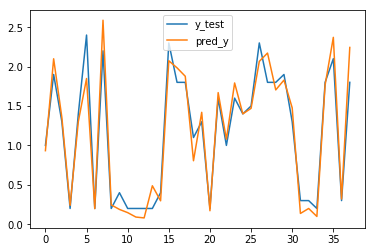

In [14]:
plt.plot(y_test)
plt.plot(pred_y)
plt.legend(['y_test', 'pred_y'])

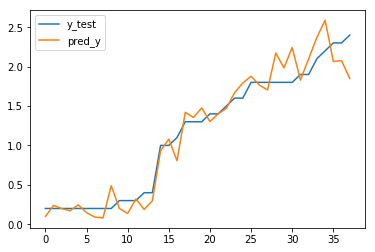

In [15]:
idx = np.argsort(y_test)

plt.plot(y_test[idx])
plt.plot(pred_y[idx])
plt.legend(['y_test', 'pred_y'])

In [27]:
model.coef_ # 가중치 또는 기울기

array([-0.19534608,  0.20502527,  0.51248152])

In [28]:
model.intercept_ # 절편

-0.2321115734821657

In [ ]:
#pred_y = w1*X[:,0] + w2*X[:,1] + w3*X[:,2] + b

In [30]:
w1, w2, w3 = model.coef_
b = model.intercept_

In [31]:
X_test[0]

array([7.2, 3.6, 6.1])

In [32]:
w1*7.2 + w2*3.6 + w3*6.1 + b

2.2256248363647977

In [33]:
model.predict(X_test[[0]]) # X_test[0].reshape(-1,1)

array([2.22562484])

Text(0,0.5,'pred_y')

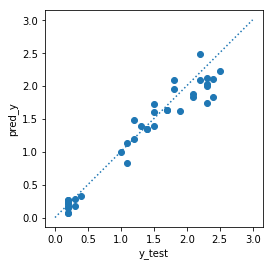

In [35]:
plt.scatter(y_test, pred_y)
plt.plot([0,3], [0,3], ':')
plt.axis('scaled')
plt.xlabel('y_test')
plt.ylabel('pred_y')

(0, 2)

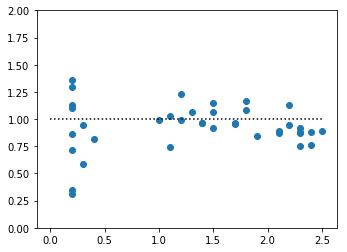

In [40]:
plt.scatter(y_test, pred_y/y_test)
plt.hlines([1],0,2.5,linestyles=':')
plt.axis('scaled')
plt.ylim(0,2)

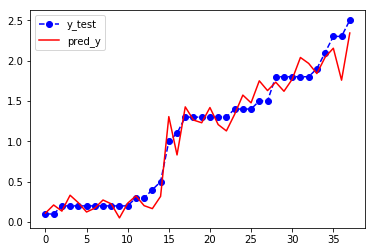

In [20]:
idx = np.argsort(y_test)

plt.plot(y_test[idx], 'bo--')
plt.plot(pred_y[idx], 'r-')
plt.legend(['y_test', 'pred_y'])

### 속성 하나와 목표값 하나로 제한

In [48]:
# petal width 를 속성값, petal length 를 목표값으로 하자
# 학습/테스트 데이터를 분리하지 않는다
X = iris.data[:,[3]] # iris.data[:,3].reshape(-1,1)
y = iris.data[:,2]

In [49]:
# 훈련을 시켜 기울기와 절편값을 구한다
model = LinearRegression()
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [50]:
model.coef_, model.intercept_

(array([2.22588531]), 1.090572145877378)

In [51]:
w = model.coef_[0]
b = model.intercept_

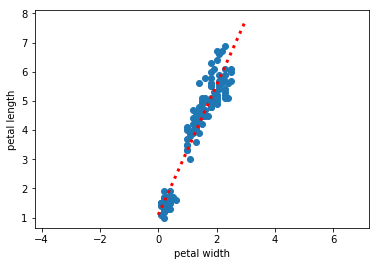

In [63]:
# 아래 그림에 근사하는 직선을 그려보자
plt.scatter(iris.data[:,3], iris.data[:,2])
plt.plot([0, 3], [b, 3*w+b], 'r:', lw=3)
plt.axis('equal')
plt.xlabel('petal width')
plt.ylabel('petal length')
pass

In [59]:
model.score(X, y)

0.9269012279220037

In [62]:
pred_y = model.predict(X)
display(y, pred_y)

array([1.4, 1.4, 1.3, 1.5, 1.4, 1.7, 1.4, 1.5, 1.4, 1.5, 1.5, 1.6, 1.4,
       1.1, 1.2, 1.5, 1.3, 1.4, 1.7, 1.5, 1.7, 1.5, 1. , 1.7, 1.9, 1.6,
       1.6, 1.5, 1.4, 1.6, 1.6, 1.5, 1.5, 1.4, 1.5, 1.2, 1.3, 1.5, 1.3,
       1.5, 1.3, 1.3, 1.3, 1.6, 1.9, 1.4, 1.6, 1.4, 1.5, 1.4, 4.7, 4.5,
       4.9, 4. , 4.6, 4.5, 4.7, 3.3, 4.6, 3.9, 3.5, 4.2, 4. , 4.7, 3.6,
       4.4, 4.5, 4.1, 4.5, 3.9, 4.8, 4. , 4.9, 4.7, 4.3, 4.4, 4.8, 5. ,
       4.5, 3.5, 3.8, 3.7, 3.9, 5.1, 4.5, 4.5, 4.7, 4.4, 4.1, 4. , 4.4,
       4.6, 4. , 3.3, 4.2, 4.2, 4.2, 4.3, 3. , 4.1, 6. , 5.1, 5.9, 5.6,
       5.8, 6.6, 4.5, 6.3, 5.8, 6.1, 5.1, 5.3, 5.5, 5. , 5.1, 5.3, 5.5,
       6.7, 6.9, 5. , 5.7, 4.9, 6.7, 4.9, 5.7, 6. , 4.8, 4.9, 5.6, 5.8,
       6.1, 6.4, 5.6, 5.1, 5.6, 6.1, 5.6, 5.5, 4.8, 5.4, 5.6, 5.1, 5.1,
       5.9, 5.7, 5.2, 5. , 5.2, 5.4, 5.1])

array([1.53574921, 1.53574921, 1.53574921, 1.53574921, 1.53574921,
       1.98092627, 1.75833774, 1.53574921, 1.53574921, 1.31316068,
       1.53574921, 1.53574921, 1.31316068, 1.31316068, 1.53574921,
       1.98092627, 1.98092627, 1.75833774, 1.75833774, 1.75833774,
       1.53574921, 1.98092627, 1.53574921, 2.2035148 , 1.53574921,
       1.53574921, 1.98092627, 1.53574921, 1.53574921, 1.53574921,
       1.53574921, 1.98092627, 1.31316068, 1.53574921, 1.31316068,
       1.53574921, 1.53574921, 1.31316068, 1.53574921, 1.53574921,
       1.75833774, 1.75833774, 1.53574921, 2.42610333, 1.98092627,
       1.75833774, 1.53574921, 1.53574921, 1.53574921, 1.53574921,
       4.20681158, 4.42940011, 4.42940011, 3.98422304, 4.42940011,
       3.98422304, 4.65198864, 3.31645745, 3.98422304, 4.20681158,
       3.31645745, 4.42940011, 3.31645745, 4.20681158, 3.98422304,
       4.20681158, 4.42940011, 3.31645745, 4.42940011, 3.53904598,
       5.0971657 , 3.98422304, 4.42940011, 3.76163451, 3.98422

In [64]:
y.mean()

3.758666666666666

- 회귀에서의 평가 점수는 $R^2$ (Coefficient of Determination, 결정계수) 이라는 것을 사용한다.<br>

> $R^2 = 1 - \frac{\sum (y-\hat{y})^2} {\sum (y-\bar{y})^2} $  ($\bar{y}$ 는 평균, $\hat{y}$ 는 예측값)<br>
> 평균값으로 예측한 경우에 비해 얼마나 잘 예측했는지를 평가한다. (최대값은 1)<br>
> $R^2$ 값이 1 이면 완벽하게 예측했다는 의미이고, 0 이면 누구나 하듯이 평균값으로 에측했다는 의미이다. 그리고 음수이면 평균값 예측보다도 못하다는 의미가 된다.

- 앞에서 model.fit() 을 하고 나면, model.coef\_ 으로 기울기 값을 model.intercept\_ 로 y절편 값을 얻을 수 있다.
- 그런데 앞의 예제는 앞에서 중요하게 강조했던 학습세트와 테스트세트로 분리하지 않았다. 그냥 전체 데이터를 사용하여 두 속성의 상관관계 만을 알고 싶었기 때문이다.
- 하지만 제대로 머신러닝 과정을 밟기 위해 아래에서 학습세트와 테스트세트로 분리하여 적용해 보자. 이렇게 하면 여러가지 예측모델 중에서 어떤 예측모델이 더 나은지 판단할 수 있게 된다.

### 속성들 간의 관계를 선형회귀로 알아보자

In [65]:
X = iris.data[:,[0]] # iris.data[:,3].reshape(-1,1)
y = iris.data[:,1]

In [66]:
model = LinearRegression()
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [67]:
model.coef_, model.intercept_

(array([-0.05726823]), 3.3886373794881)

In [68]:
w = model.coef_[0]
b = model.intercept_

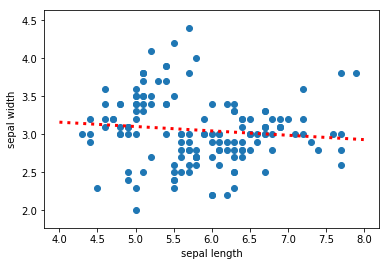

In [70]:
plt.scatter(iris.data[:,0], iris.data[:,1])
plt.plot([4, 8], [4*w+b, 8*w+b], 'r:', lw=3)
plt.axis('equal')
plt.xlabel('sepal length')
plt.ylabel('sepal width')

In [71]:
model.score(X, y)

0.011961632834767588

In [72]:
X = iris.data[:,[0]] # iris.data[:,3].reshape(-1,1)
y = iris.data[:,2]

In [73]:
model = LinearRegression()
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [74]:
model.coef_, model.intercept_

(array([1.85750967]), -7.0953814782793145)

In [75]:
w = model.coef_[0]
b = model.intercept_

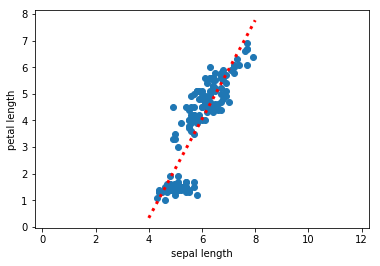

In [79]:
# 아래 그림에 근사하는 직선을 그려보자
plt.scatter(iris.data[:,0], iris.data[:,2])
plt.plot([4, 8], [4*w+b, 8*w+b], 'r:', lw=3)
plt.axis('equal')
plt.xlabel('sepal length')
plt.ylabel('petal length')
pass

In [78]:
model.score(X, y)

0.7599553107783261

In [ ]:
# MSE (Mean Squared Error) 를 구하자 => y 와 pred_y 를 이용
pred_y = model.predict(X)
mse = ((pred_y - y)**2).mean()
mae = (np.abs(pred_y-y)).mean()
mse, mae

### 모든 속성 적용하기

- 이제 타겟값인 petal_width 를 제외한 나머지 세가지 속성을 모두 사용하여 선형회귀를 적용해 보자.
- 이럴 경우, 4차원 상에 3차원 초평면으로 예측하기 때문에 그림으로 결과를 표현하기는 쉽지 않다.

In [37]:
X = iris.data[:,:3]
y = iris.data[:,3]

X_train,X_test,y_train,y_test = train_test_split(X, y)

model = LinearRegression()
model.fit(X_train, y_train)

w = model.coef_ # 기울기 (데이터의 속성이 3개이므로 값이 3개임)
b = model.intercept_ # y 절편

print('w =',w)
print('b =',b)

w = [-0.25262564  0.26218795  0.54348953]
b = -0.17445381394099968


In [45]:
score1 = model.score(X_train, y_train)
score2 = model.score(X_test, y_test)
display('학습세트 점수: %f' % score1, '테스트세트 점수: %f' % score2) # R^2 값

'학습세트 점수: 0.926902'

'테스트세트 점수: 0.925286'

- 속성이 3개이므로 w 의 값은 3개이다.
> $pred\_y = w_1 \cdot x_1 + w_2 \cdot x_2 + w_3 \cdot x_3 + b$

- train_test_split() 함수를 호출할 때 마다 훈련세트/테스트세트 가 새롭게 구성되므로 score 가 달라질 수 있고 학습 보다 테스트 시 더 score 가 높은 경우도 있다.
- 다양한 선형회귀 모델은 다음 URL 을 참고하자. (http://scikit-learn.org/stable/modules/linear_model.html)
- 선형회귀의 변종인 릿지회귀와 라쏘회귀는 뒤에서 다룬다.
- 2차곡선, 3차곡선 과 같이 다항식을 적용한 다항회귀도 있다. (위 URL의 1.1.16 참고)

In [39]:
x = [[1,2,3], [2,2,4]]
model.predict(x)

array([1.72776505, 2.01862895])

In [40]:
# [1,2,3] 샘플에 대한 예측값 직접 계산
model.coef_[0]*1 + model.coef_[1]*2 + model.coef_[2]*3 + model.intercept_

1.7277650536860119

- 선형회귀에서 사용하는 선형 알고리즘은 다른 많은 머신러닝 알고리즘의 기반이 된다.
- 특히 신경망의 핵심 알고리즘은 선형회귀에서 나온 것이며, 가장 간단한 신경망은 곧 선형회귀와 같다.

In [46]:
X = iris.data[:,:2]
y = iris.data[:,3]

X_train,X_test,y_train,y_test = train_test_split(X, y)

model = LinearRegression()
model.fit(X_train, y_train)

w = model.coef_ # 가중치
b = model.intercept_ # y 절편

print('w =',w)
print('b =',b)

w = [ 0.73769041 -0.51141073]
b = -1.5614067257337525


In [47]:
model.score(X_test, y_test)

0.7369987746782513

### 와인데이터 회귀 적용

In [83]:
wine = np.loadtxt('winequality-red.csv', skiprows=1, delimiter=';')

In [84]:
col1 = 0
col2 = 2

In [85]:
wine[:,2]

array([0.  , 0.  , 0.04, ..., 0.13, 0.12, 0.47])

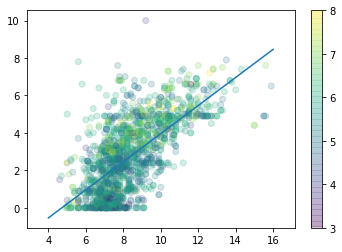

In [86]:
plt.scatter(wine[:,col1], wine[:,col2]*10, c=wine[:,-1], alpha=0.2)
plt.colorbar()
plt.axis('equal')
plt.plot([4,16],[4*0.75-3.54, 16*0.75-3.54])

In [87]:
X = wine[:,[0]]
y = wine[:,2]

model = LinearRegression()
model.fit(X, y)

w = model.coef_[0] # 기울기
b = model.intercept_ # y 절편

print('w =',w)
print('b =',b)

w = 0.0751529893715566
b = -0.3542700018191085


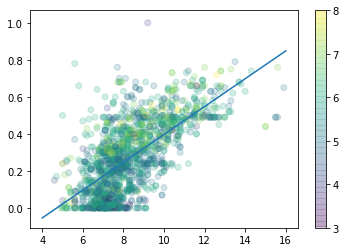

In [88]:
plt.scatter(wine[:,0], wine[:,2], c=wine[:,-1], alpha=0.2)
plt.colorbar()
plt.plot([4,16],[4*w+b, 16*w+b])

In [89]:
model.score(X, y)

0.4511855042738975

In [91]:
from sklearn.datasets import load_wine

wine2 = load_wine()
dir(wine2)

['DESCR', 'data', 'feature_names', 'target', 'target_names']

In [93]:
wine2.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

### 모든 속성 적용하여 점수 예측

In [94]:
wine = np.loadtxt('winequality-red.csv', skiprows=1, delimiter=';')

X = wine[:,:-1]
y = wine[:,-1]

model = LinearRegression()
model.fit(X, y)

w = model.coef_ # 기울기
b = model.intercept_ # y 절편

print('w =',w)
print('b =',b)

w = [ 2.49905527e-02 -1.08359026e+00 -1.82563948e-01  1.63312698e-02
 -1.87422516e+00  4.36133331e-03 -3.26457970e-03 -1.78811638e+01
 -4.13653144e-01  9.16334413e-01  2.76197699e-01]
b = 21.965208449448404


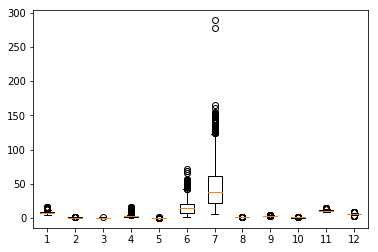

In [96]:
plt.boxplot(wine)
pass

In [49]:
model.score(X, y)

0.3605517030386881

In [97]:
pred_y = model.predict(X)

MAE = np.abs(y - pred_y).sum()/len(y)
MAE

0.5004899635644872

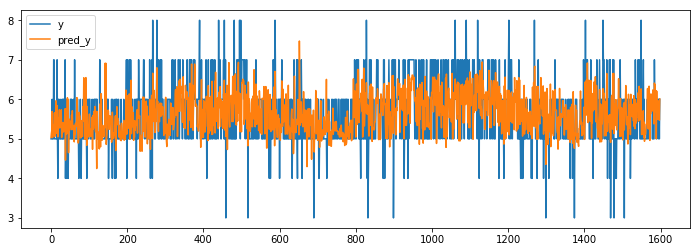

In [51]:
plt.figure(figsize=[12,4])
plt.plot(y)
plt.plot(pred_y)
plt.legend(['y', 'pred_y'])

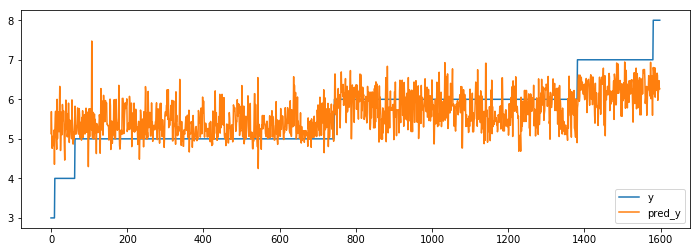

In [57]:
idx = np.argsort(y)

plt.figure(figsize=[12,4])
plt.plot(y[idx])
plt.plot(pred_y[idx])
plt.legend(['y', 'pred_y'])

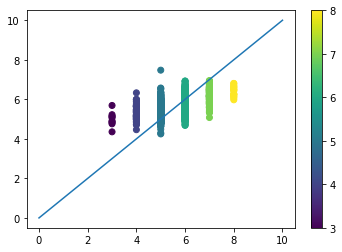

In [99]:
plt.scatter(y, pred_y, c=y)
plt.colorbar()
plt.plot([0,10], [0,10])

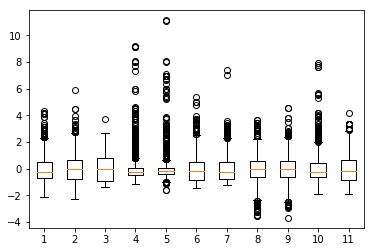

In [101]:
X_norm = (X-X.mean(axis=0))/X.std(axis=0)
plt.boxplot(X_norm)
pass

In [102]:
model = LinearRegression()
model.fit(X_norm, y)

w = model.coef_ # 기울기
b = model.intercept_ # y 절편

print('w =',w)
print('b =',b)

w = [ 0.04349735 -0.19396667 -0.03555254  0.02301871 -0.08818339  0.04560596
 -0.10735582 -0.03373717 -0.06384247  0.1552765   0.29424288]
b = 5.636022514071305


In [103]:
model.score(X_norm, y)

0.3605517030386882

<Container object of 11 artists>

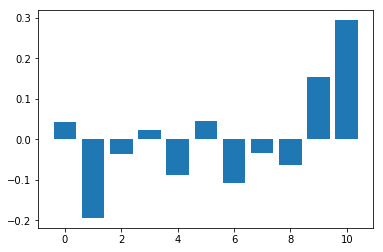

In [105]:
plt.bar(range(11), w)

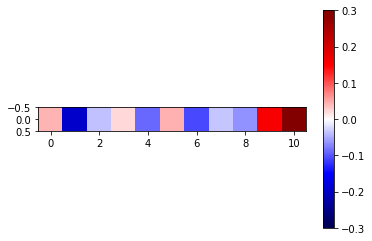

In [110]:
plt.imshow(w.reshape(1,-1), vmin= -0.3, vmax=0.3, cmap='seismic')
plt.colorbar()

### 지하철 데이터 적용

In [111]:
import pandas as pd

In [112]:
subway = pd.read_csv('CARD_SUBWAY_MONTH_201905.csv')
subway.head()

,사용일자,노선명,역ID,역명,승차총승객수,하차총승객수,등록일자
0,20190501,일산선,1955,마두,8528,8796,20190504
1,20190501,일산선,1954,백석,10118,10399,20190504
2,20190501,일산선,1953,대곡,1655,1406,20190504
3,20190501,일산선,1952,화정,20102,20951,20190504
4,20190501,일산선,1951,원당,11419,11064,20190504


In [113]:
data = subway[['승차총승객수', '하차총승객수']].values
data.shape

(17746, 2)

In [126]:
X = data[:,[0]]
y = data[:,1]

model = LinearRegression()
model.fit(X, y)

w = model.coef_ # 기울기
b = model.intercept_ # y 절편

print('w =',w)
print('b =',b)

w = [1.01252421]
b = -218.6894464379002


(-6132.450448028674,
 128781.45940860215,
 -7210.474608605271,
 146608.79895907687)

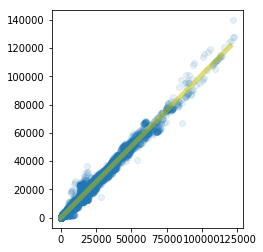

In [128]:
plt.scatter(X, y, alpha=0.1)
plt.plot([0,120000], [b, 120000*w+b], 'y-', linewidth=5, alpha=0.5)
plt.axis('scaled')

In [121]:
data2 = data[data[:,0]>100000]

X = data2[:,[0]]
y = data2[:,1]

model = LinearRegression()
model.fit(X, y)

w = model.coef_ # 기울기
b = model.intercept_ # y 절편

print('w =',w)
print('b =',b)

w = [1.11184782]
b = -9101.899585585212


(100000, 150000)

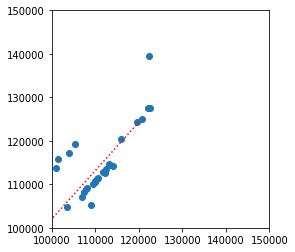

In [125]:
plt.scatter(X, y)
plt.plot([0,120000], [b, 120000*w+b], 'r:')
plt.axis('scaled')
plt.xlim(100000, 150000)
plt.ylim(100000, 150000)

### world 데이터 적용
```
CREATE TABLE `country` (
  `Code` char(3) NOT NULL DEFAULT '',
  `Name` char(52) NOT NULL DEFAULT '',
  `Continent` enum('Asia','Europe','North America','Africa','Oceania','Antarctica','South America') NOT NULL DEFAULT 'Asia',
  `Region` char(26) NOT NULL DEFAULT '',
  `SurfaceArea` decimal(10,2) NOT NULL DEFAULT '0.00',
  `IndepYear` smallint DEFAULT NULL,
  `Population` int NOT NULL DEFAULT '0',
  `LifeExpectancy` decimal(3,1) DEFAULT NULL,
  `GNP` decimal(10,2) DEFAULT NULL,
  `GNPOld` decimal(10,2) DEFAULT NULL,
  `LocalName` char(45) NOT NULL DEFAULT '',
  `GovernmentForm` char(45) NOT NULL DEFAULT '',
  `HeadOfState` char(60) DEFAULT NULL,
  `Capital` int DEFAULT NULL,
  `Code2` char(2) NOT NULL DEFAULT '',
  PRIMARY KEY (`Code`)
) ENGINE=InnoDB DEFAULT CHARSET=utf8mb4;
```

In [132]:
world = pd.read_csv('world.csv', header=None, quotechar="'")

In [ ]:
world.columns = [....]

In [133]:
world.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239 entries, 0 to 238
Data columns (total 15 columns):
0     239 non-null object
1     239 non-null object
2     239 non-null object
3     239 non-null object
4     239 non-null float64
5     192 non-null float64
6     239 non-null int64
7     222 non-null float64
8     239 non-null float64
9     178 non-null float64
10    239 non-null object
11    239 non-null object
12    236 non-null object
13    232 non-null float64
14    238 non-null object
dtypes: float64(6), int64(1), object(8)
memory usage: 28.1+ KB


In [138]:
world.describe()

,4,5,6,7,8,9,13
count,2.390000e+02,192.000000,2.390000e+02,222.000000,2.390000e+02,1.780000e+02,232.000000
mean,6.232481e+05,1847.260417,2.543410e+07,66.486036,1.228239e+05,1.655343e+05,2071.306034
std,1.924140e+06,420.831370,1.093398e+08,11.519267,6.379976e+05,7.204689e+05,1184.095609
min,4.000000e-01,-1523.000000,0.000000e+00,37.200000,0.000000e+00,1.570000e+02,1.000000
25%,2.275000e+03,1906.750000,2.380000e+05,60.300000,6.400000e+02,2.187000e+03,915.750000
50%,7.174000e+04,1960.000000,3.869000e+06,70.150000,4.787000e+03,8.421000e+03,2449.500000
75%,3.987545e+05,1974.000000,1.493550e+07,75.500000,2.994450e+04,7.114550e+04,3065.250000
max,1.707540e+07,1994.000000,1.277558e+09,83.500000,8.510700e+06,8.110900e+06,4074.000000


In [134]:
world[[6,8]].head()

,6,8
0,103000,828.0
1,22720000,5976.0
2,12878000,6648.0
3,8000,63.2
4,3401200,3205.0


In [139]:
data = world[[6,8]].values * [0.01, 1]
data[:5]

array([[1.0300e+03, 8.2800e+02],
       [2.2720e+05, 5.9760e+03],
       [1.2878e+05, 6.6480e+03],
       [8.0000e+01, 6.3200e+01],
       [3.4012e+04, 3.2050e+03]])

In [140]:
X = data[:,[0]]
y = data[:,1]

model = LinearRegression()
model.fit(X, y)

w = model.coef_ # 기울기
b = model.intercept_ # y 절편

print('w =',w)
print('b =',b)

w = [0.16408199]
b = 81091.10747673977


(0, 2000000.0)

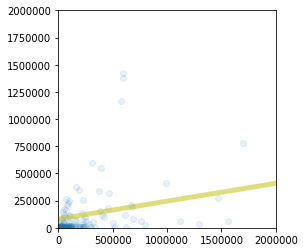

In [144]:
plt.scatter(X, y, alpha=0.1)
plt.plot([0, 1.3e7], [b, 1.3e7*w+b], 'y-', linewidth=5, alpha=0.5)
plt.axis('scaled')
plt.xlim(0,0.2e7)
plt.ylim(0,0.2e7)


In [145]:
model.score(X, y)

0.07907523077375755

In [146]:
data2 = world[[6,7,8]]
data2.head()

,6,7,8
0,103000,78.4,828.0
1,22720000,45.9,5976.0
2,12878000,38.3,6648.0
3,8000,76.1,63.2
4,3401200,71.6,3205.0


In [148]:
data2.shape

(239, 3)

In [149]:
data3 = data2.dropna()
data3.shape

(222, 3)

In [150]:
wdata = data3.values

In [151]:
wdata.shape

(222, 3)

In [152]:
wdata[:5] # 인구수, 기대수명, GNP

array([[1.0300e+05, 7.8400e+01, 8.2800e+02],
       [2.2720e+07, 4.5900e+01, 5.9760e+03],
       [1.2878e+07, 3.8300e+01, 6.6480e+03],
       [8.0000e+03, 7.6100e+01, 6.3200e+01],
       [3.4012e+06, 7.1600e+01, 3.2050e+03]])

In [154]:
(wdata[:,2]/wdata[:,0])[:5]

array([0.00803883, 0.00026303, 0.00051623, 0.0079    , 0.00094231])

In [155]:
wdata2 = np.c_[wdata, wdata[:,2]/wdata[:,0]]
wdata2.shape # # 인구수, 기대수명, GNP, 일인당GNP

(222, 4)

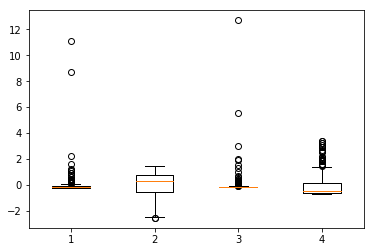

In [158]:
wdata3 = (wdata2-wdata2.mean(axis=0))/wdata2.std(axis=0)
plt.boxplot(wdata3)
pass

In [163]:
wdata4 = wdata3[wdata3[:,3]>0]

In [166]:
X = wdata3[:,[3]]
y = wdata3[:,1]

model = LinearRegression()
model.fit(X, y)

w = model.coef_ # 기울기
b = model.intercept_ # y 절편

print('w =',w)
print('b =',b)

w = [0.54425044]
b = -3.934950605345577e-16


(-1.25, 4.25, -2.7988395423416748, 2.4139465963635263)

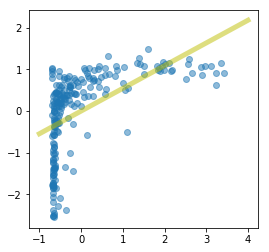

In [167]:
plt.scatter(X, y, alpha=0.5)
plt.plot([-1, 4], [-1*w+b, 4*w+b], 'y-', linewidth=5, alpha=0.5)
plt.axis('scaled')
#plt.xlim(0,0.2e7)
#plt.ylim(0,0.2e7)


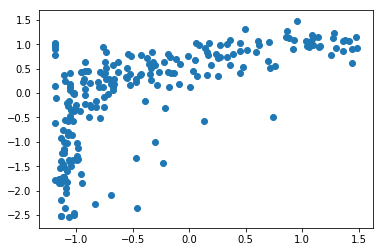

In [169]:
plt.scatter(np.log(X+1), y)

### 행렬식 계산

In [17]:
X = iris.data[:,:3]
y = iris.data[:,3] # petal width

In [18]:
X

array([[5.1, 3.5, 1.4],
       [4.9, 3. , 1.4],
       [4.7, 3.2, 1.3],
       [4.6, 3.1, 1.5],
       [5. , 3.6, 1.4],
       [5.4, 3.9, 1.7],
       [4.6, 3.4, 1.4],
       [5. , 3.4, 1.5],
       [4.4, 2.9, 1.4],
       [4.9, 3.1, 1.5],
       [5.4, 3.7, 1.5],
       [4.8, 3.4, 1.6],
       [4.8, 3. , 1.4],
       [4.3, 3. , 1.1],
       [5.8, 4. , 1.2],
       [5.7, 4.4, 1.5],
       [5.4, 3.9, 1.3],
       [5.1, 3.5, 1.4],
       [5.7, 3.8, 1.7],
       [5.1, 3.8, 1.5],
       [5.4, 3.4, 1.7],
       [5.1, 3.7, 1.5],
       [4.6, 3.6, 1. ],
       [5.1, 3.3, 1.7],
       [4.8, 3.4, 1.9],
       [5. , 3. , 1.6],
       [5. , 3.4, 1.6],
       [5.2, 3.5, 1.5],
       [5.2, 3.4, 1.4],
       [4.7, 3.2, 1.6],
       [4.8, 3.1, 1.6],
       [5.4, 3.4, 1.5],
       [5.2, 4.1, 1.5],
       [5.5, 4.2, 1.4],
       [4.9, 3.1, 1.5],
       [5. , 3.2, 1.2],
       [5.5, 3.5, 1.3],
       [4.9, 3.1, 1.5],
       [4.4, 3. , 1.3],
       [5.1, 3.4, 1.5],
       [5. , 3.5, 1.3],
       [4.5, 2.3

In [19]:
X*[1,2,3]

array([[ 5.1,  7. ,  4.2],
       [ 4.9,  6. ,  4.2],
       [ 4.7,  6.4,  3.9],
       [ 4.6,  6.2,  4.5],
       [ 5. ,  7.2,  4.2],
       [ 5.4,  7.8,  5.1],
       [ 4.6,  6.8,  4.2],
       [ 5. ,  6.8,  4.5],
       [ 4.4,  5.8,  4.2],
       [ 4.9,  6.2,  4.5],
       [ 5.4,  7.4,  4.5],
       [ 4.8,  6.8,  4.8],
       [ 4.8,  6. ,  4.2],
       [ 4.3,  6. ,  3.3],
       [ 5.8,  8. ,  3.6],
       [ 5.7,  8.8,  4.5],
       [ 5.4,  7.8,  3.9],
       [ 5.1,  7. ,  4.2],
       [ 5.7,  7.6,  5.1],
       [ 5.1,  7.6,  4.5],
       [ 5.4,  6.8,  5.1],
       [ 5.1,  7.4,  4.5],
       [ 4.6,  7.2,  3. ],
       [ 5.1,  6.6,  5.1],
       [ 4.8,  6.8,  5.7],
       [ 5. ,  6. ,  4.8],
       [ 5. ,  6.8,  4.8],
       [ 5.2,  7. ,  4.5],
       [ 5.2,  6.8,  4.2],
       [ 4.7,  6.4,  4.8],
       [ 4.8,  6.2,  4.8],
       [ 5.4,  6.8,  4.5],
       [ 5.2,  8.2,  4.5],
       [ 5.5,  8.4,  4.2],
       [ 4.9,  6.2,  4.5],
       [ 5. ,  6.4,  3.6],
       [ 5.5,  7. ,  3.9],
 

In [20]:
W = np.array([1,2,3]) # [w1, w2, w3]

X*W

array([[ 5.1,  7. ,  4.2],
       [ 4.9,  6. ,  4.2],
       [ 4.7,  6.4,  3.9],
       [ 4.6,  6.2,  4.5],
       [ 5. ,  7.2,  4.2],
       [ 5.4,  7.8,  5.1],
       [ 4.6,  6.8,  4.2],
       [ 5. ,  6.8,  4.5],
       [ 4.4,  5.8,  4.2],
       [ 4.9,  6.2,  4.5],
       [ 5.4,  7.4,  4.5],
       [ 4.8,  6.8,  4.8],
       [ 4.8,  6. ,  4.2],
       [ 4.3,  6. ,  3.3],
       [ 5.8,  8. ,  3.6],
       [ 5.7,  8.8,  4.5],
       [ 5.4,  7.8,  3.9],
       [ 5.1,  7. ,  4.2],
       [ 5.7,  7.6,  5.1],
       [ 5.1,  7.6,  4.5],
       [ 5.4,  6.8,  5.1],
       [ 5.1,  7.4,  4.5],
       [ 4.6,  7.2,  3. ],
       [ 5.1,  6.6,  5.1],
       [ 4.8,  6.8,  5.7],
       [ 5. ,  6. ,  4.8],
       [ 5. ,  6.8,  4.8],
       [ 5.2,  7. ,  4.5],
       [ 5.2,  6.8,  4.2],
       [ 4.7,  6.4,  4.8],
       [ 4.8,  6.2,  4.8],
       [ 5.4,  6.8,  4.5],
       [ 5.2,  8.2,  4.5],
       [ 5.5,  8.4,  4.2],
       [ 4.9,  6.2,  4.5],
       [ 5. ,  6.4,  3.6],
       [ 5.5,  7. ,  3.9],
 

In [21]:
(X*W).sum(axis=1)

array([16.3, 15.1, 15. , 15.3, 16.4, 18.3, 15.6, 16.3, 14.4, 15.6, 17.3,
       16.4, 15. , 13.6, 17.4, 19. , 17.1, 16.3, 18.4, 17.2, 17.3, 17. ,
       14.8, 16.8, 17.3, 15.8, 16.6, 16.7, 16.2, 15.9, 15.8, 16.7, 17.9,
       18.1, 15.6, 15. , 16.4, 15.6, 14.3, 16.4, 15.9, 13. , 14.7, 16.8,
       18.4, 15. , 17.5, 15.2, 17.2, 15.8, 27.5, 26.3, 27.8, 22.1, 25.9,
       24.8, 27. , 19.6, 26.2, 22.3, 19.5, 24.5, 22.4, 26. , 22.2, 26.1,
       25.1, 23.5, 24.1, 22.3, 26.7, 23.7, 26. , 25.8, 25.1, 25.8, 26.8,
       27.7, 25.3, 21.4, 21.7, 21.4, 22.9, 26.7, 24.9, 26.3, 27. , 24.1,
       23.9, 22.5, 23.9, 25.9, 23. , 19.5, 23.6, 24.3, 24.1, 24.9, 19.1,
       23.6, 30.9, 26.5, 30.8, 28.9, 29.9, 33.4, 23.4, 32. , 29.1, 32.7,
       28.2, 27.7, 29.3, 25.7, 26.7, 28.7, 29. , 35.4, 33.6, 25.4, 30.4,
       25.9, 33.4, 26.4, 30.4, 31.6, 26.2, 26.8, 28.8, 30.6, 31.3, 34.7,
       28.8, 27.2, 28.1, 32. , 29.9, 29.1, 26.4, 29.3, 29.7, 28.4, 26.5,
       30.9, 30.4, 28.3, 26.3, 28.1, 29.2, 27.2])

In [22]:
W = np.array([1,2,3]) # [w1, w2, w3]
b = 1

pred_y = (X*W).sum(axis=1) + b # model.predict(X)

In [23]:
mse = ((pred_y - y)**2).mean()
mse

555.4736666666666

In [24]:
W = np.array([1,2,3]) # [w1, w2, w3]
b = 1

pred_y = X@W + b # np.dot(X,W)+b, np.matmul(X,W)+b
pred_y

array([17.3, 16.1, 16. , 16.3, 17.4, 19.3, 16.6, 17.3, 15.4, 16.6, 18.3,
       17.4, 16. , 14.6, 18.4, 20. , 18.1, 17.3, 19.4, 18.2, 18.3, 18. ,
       15.8, 17.8, 18.3, 16.8, 17.6, 17.7, 17.2, 16.9, 16.8, 17.7, 18.9,
       19.1, 16.6, 16. , 17.4, 16.6, 15.3, 17.4, 16.9, 14. , 15.7, 17.8,
       19.4, 16. , 18.5, 16.2, 18.2, 16.8, 28.5, 27.3, 28.8, 23.1, 26.9,
       25.8, 28. , 20.6, 27.2, 23.3, 20.5, 25.5, 23.4, 27. , 23.2, 27.1,
       26.1, 24.5, 25.1, 23.3, 27.7, 24.7, 27. , 26.8, 26.1, 26.8, 27.8,
       28.7, 26.3, 22.4, 22.7, 22.4, 23.9, 27.7, 25.9, 27.3, 28. , 25.1,
       24.9, 23.5, 24.9, 26.9, 24. , 20.5, 24.6, 25.3, 25.1, 25.9, 20.1,
       24.6, 31.9, 27.5, 31.8, 29.9, 30.9, 34.4, 24.4, 33. , 30.1, 33.7,
       29.2, 28.7, 30.3, 26.7, 27.7, 29.7, 30. , 36.4, 34.6, 26.4, 31.4,
       26.9, 34.4, 27.4, 31.4, 32.6, 27.2, 27.8, 29.8, 31.6, 32.3, 35.7,
       29.8, 28.2, 29.1, 33. , 30.9, 30.1, 27.4, 30.3, 30.7, 29.4, 27.5,
       31.9, 31.4, 29.3, 27.3, 29.1, 30.2, 28.2])

In [25]:
cost = ((X@W+b-y)**2).mean() # MSE
cost

555.4736666666666